<a href="https://colab.research.google.com/github/SomyaH99/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Title : Cardiovascular Risk Prediction**

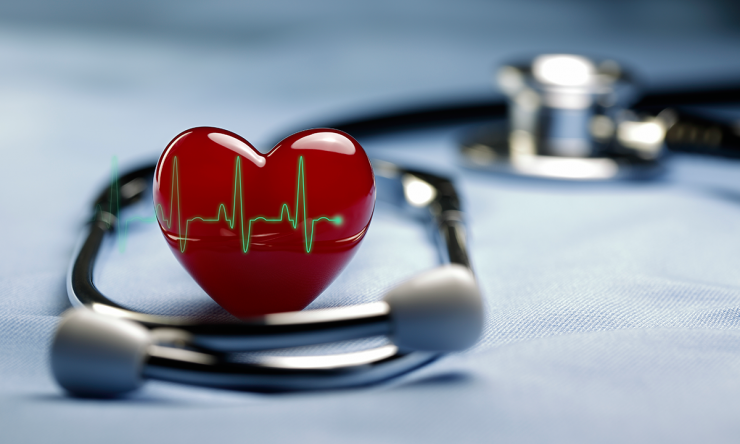

#**Problem Description**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patient's information. It includes over 4,000 records and 15 attributes.


#**Data Description**

**Variables:**
 

*  Each attribute is a potential risk factor. There are both demographic,behavioral, and medical risk factors.




**Demographic:**


*   **Sex:** male or female("M" or "F")
*   **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)



**Behavioral:**

*   **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
*   **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)



**Medical( history)**

*   **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)
*   **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)
*   **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)
*   **Diabetes:** whether or not the patient had diabetes (Nominal)



**Medical(current):**

*   **Tot Chol:** total cholesterol level (Continuous)
*   **Sys BP:** systolic blood pressure (Continuous)
*   **Dia BP:** diastolic blood pressure (Continuous)
*   **BMI:** Body Mass Index (Continuous)
*   **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
*   **Glucose:** glucose level (Continuous)




**Predict variable (desired target):**

*  10-year risk of **coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”) - DV 



#**Importing Libraries**

In [ ]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np

# Importing warnings library. The warnings module handles warnings in Python. 
# Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

# Importing preprocessing libraries. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Importing various machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing Support vector machine Classifier.
from sklearn import svm

# Importing XGB Classifier.
import xgboost as xgb

# Importing Tensorflow for neural networks.
from tensorflow import keras
import tensorflow as tf

# Importing Sklearn metrics for model evaluation.
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score

# Importing SMOTETomek for handling class imbalancies.
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

# Importing Counter.
from collections import Counter

In [ ]:
#Loading the Data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification Capstone project/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

In [ ]:
# First 5 rows
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# last 5 index values
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
# shape of dataset
df.shape

(3390, 17)

In [ ]:
# columns in our dataset
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Description of all columns in the dataset.
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [ ]:
# information regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

* In the Dataset we have total of 3390 rows and 17 columns.

# Data Preprocessing & Feature engineering

# **Handling null values**

In [ ]:
# looking column names, datatype of features, null values, unique values and their number of unique values
df_columns_table=[[name,df[name].dtypes,df[name].isnull().sum(),round(df[name].isnull().sum()/len(df)*100, 2),
                   df[name].nunique(),df[name].unique()] for name in df.columns]
df_columns = pd.DataFrame(df_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns

,Column,Dtype,Null,Null (%),nUnique,Unique
0,id,int64,0,0.00,3390,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,age,int64,0,0.00,39,"[64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 5..."
2,education,float64,87,2.57,4,"[2.0, 4.0, 1.0, 3.0, nan]"
3,sex,object,0,0.00,2,"[F, M]"
4,is_smoking,object,0,0.00,2,"[YES, NO]"
5,cigsPerDay,float64,22,0.65,32,"[3.0, 0.0, 10.0, 20.0, 30.0, 35.0, 40.0, 15.0,..."
6,BPMeds,float64,44,1.30,2,"[0.0, nan, 1.0]"
7,prevalentStroke,int64,0,0.00,2,"[0, 1]"
8,prevalentHyp,int64,0,0.00,2,"[0, 1]"
9,diabetes,int64,0,0.00,2,"[0, 1]"


In [ ]:
# total null values present in columns
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64



We havee missing values in:
 

*   education
*   cigsperday
*   BPMeds
*   totChol
*   BMI
*   Heart Rate
*   glucose



In [ ]:
#Sanity check
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False).head()

glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
dtype: float64

* Except glucose all other features in the dataset have less than 5% null values.

* Now the main issue with these null values is that they can't be estimated from other data entries. The dataset we are working on is from a medical domain, that said, the entries in this data are person specific and the values vary among different individuals. Its a rare chance the two individuals share same health stats, hence the most logical option that we have to deal with such values is removing the rows with any null value.

In [ ]:
# Making a copy of our dataset 
new_df = df.copy()

In [ ]:
# dropping the missing value.
df1 = new_df.dropna(how = "any")

In [ ]:
# Checking if there's still any null values left.
df1.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

* There are no null values present in our dataset

# **Checking duplicate values**

In [ ]:
# Checking for the duplicate values
len(df1[df1.duplicated()])


0

* There are no duplicate values in our dataset

# Dropping irrelevant features

In [ ]:
#Dropping redundant variable "id"
df1.drop("id",axis=1,inplace=True) 



*   Since ID has no effect on target variable so we will drop this column from our dataset.



# **Dealing with outliers**

In [ ]:
# Numerical variables
numerical = [var for var in df1.columns if df1[var].dtype!='O'and var not in ['BPMeds','diabetes','prevalentStroke','prevalentHyp','TenYearCHD']]
print('There are {} numerical variables'.format(len(numerical)))
print(numerical)

There are 9 numerical variables
['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


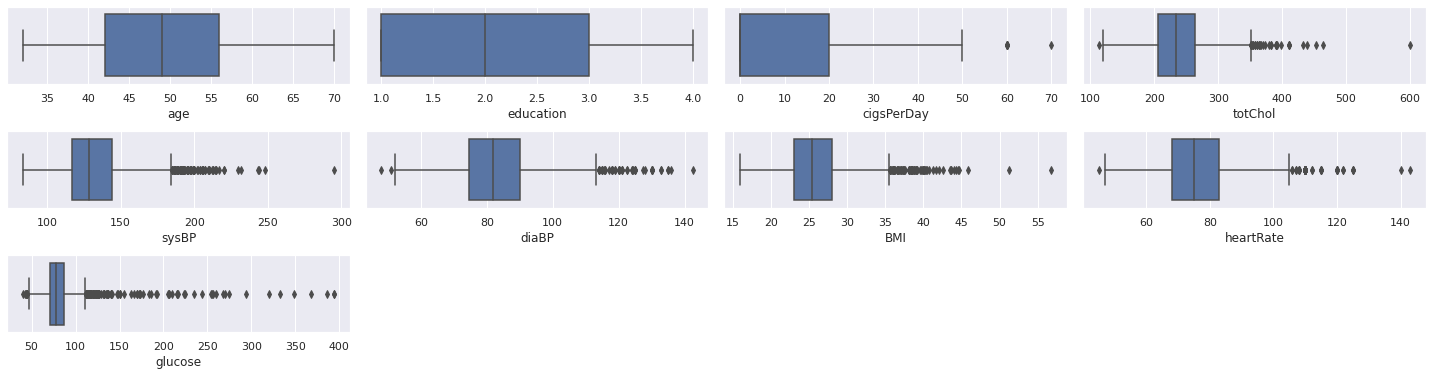

In [ ]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(df1[col])
    num_it+=1
    
plt.tight_layout()

In [ ]:
##Dealing with the outliers by Capping the outlier rows with Percentiles
for col in numerical:
  upper_lim = df1[col].quantile(.95)
  lower_lim = df1[col].quantile(.05)
  df1.loc[(df1[col] > upper_lim),col] = upper_lim
  df1.loc[(df1[col] < lower_lim),col] = lower_lim

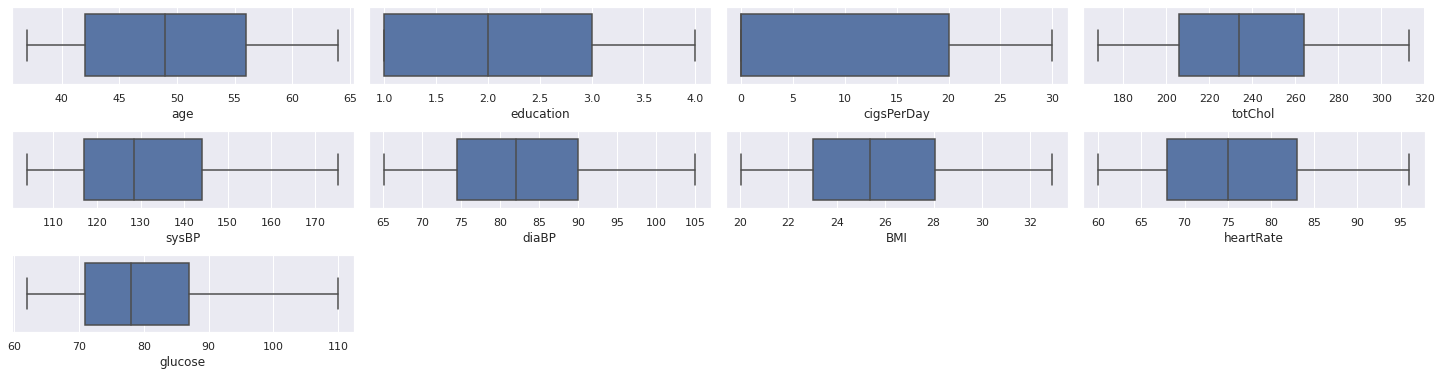

In [ ]:
##finding result 
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(df1[col])
    num_it+=1
    
plt.tight_layout()

Now, there are no outliers present in our dataset.

## 5. Combining columns


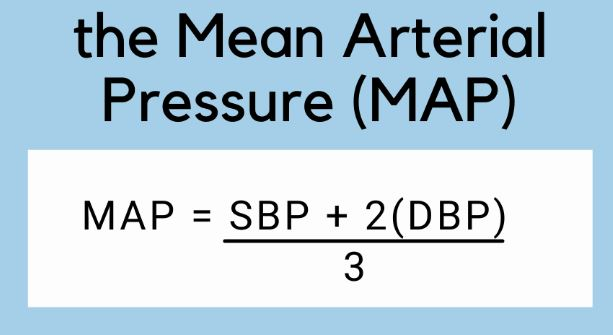

In [ ]:
# Combining systolic and diastolic blood pressure column through formula 
df1['map']=round((df1['sysBP']+2*df1['diaBP'])/3,3) # calculating mean arterial pressure and storing in seperate column

# droping systolic and diastolic blood pressure column
df1.drop(['sysBP','diaBP'],axis=1,inplace=True)

In [ ]:
df1.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,map
1,37,4.0,M,NO,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,121.333
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,86.000
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,111.333
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,102.167
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,32.80,85.0,65.0,1,128.450


# **Categorical encoding**

In [ ]:
# Categorical encoding for smoking column (0='NO' and 1 ='YES')
df1['is_smoking'].replace({'YES':1,'NO':0},inplace=True)

# Categorical encoding for smoking column (1='M' and 2 ='F')
df1['sex'].replace({'M':0,'F':1},inplace=True)

# **Renaming Target Variable**

In [ ]:
df1 = df1.rename(columns={'TenYearCHD':'Heart_Disease'})

# **Exploratory Data Analysis (EDA)**

Correlation and Heatmap

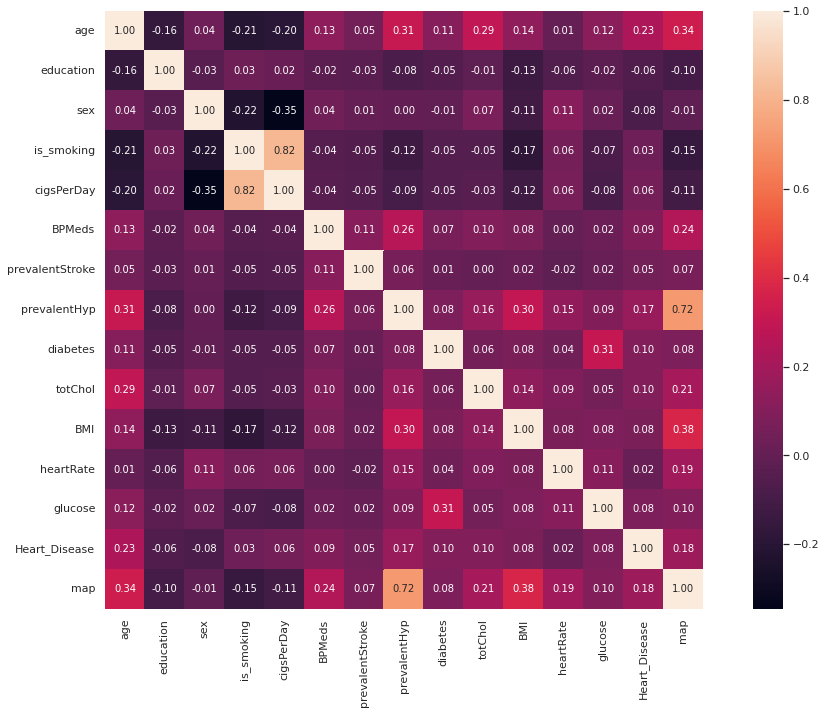

In [ ]:
# ploting heat map finding correlation between columns
cdf = df1.corr()

plt.subplots(figsize=(18, 11))
sns.heatmap(cdf,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True);

* As per the correlation matrix, cigsperday and is_smoking are highly correlated (0.82), also map and prevalentHyp are highly correlated (0.72).
* so we are dropping is_smoking column and prevalentHyp


In [ ]:
# droping is_smoking and prevalentHyp columns
df1.drop(['is_smoking','prevalentHyp'],axis=1, inplace=True)

# **Univariate analysis**

**1. Heart disease (target variable) distribution**

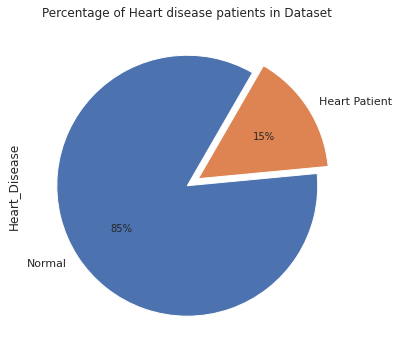

In [ ]:
# Plot
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=(14,6))
ax1 = df1['Heart_Disease'].value_counts().plot.pie( x="Heart_Disease" ,y ='no.of patients', 
autopct = "%1.0f%%",labels=["Normal","Heart Patient"], startangle = 60,ax=ax1,explode = (0,0.1))
ax1.set(title = 'Percentage of Heart disease patients in Dataset')
plt.show()

* According to pie chart, dataset contains 85% normal persons' and 15% heart patients' data.
* The class of the dataset is highly imbalanced, we will use SMOTE technique to handle class imbalance.


What is imbalanced data?

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Methods to handle imbalanced dataset

* Resampling
* SMOTE (Synthetic Minority Oversampling Technique)
* BalancedBaggingClassifier

We shall use SMOTE Technique here to balance our imbalanced dataset

* Highly imbalanced data will be dealt further at the time of model building.

**2. Genderwise distribution**

In [ ]:
# creating separate df for normal and heart patients

patient =df1[df1['Heart_Disease']==1]

normal =df1[df1['Heart_Disease']==0]

Text(0.5, 1.0, 'Distribution of Gender')

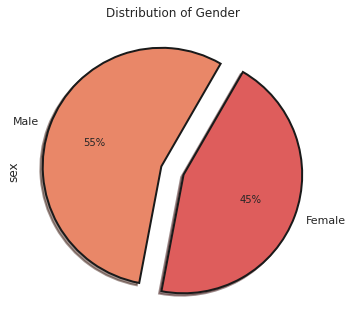

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df1['sex'].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("flare",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")

* According to pie chart, given dataset contains 55% male and 45% female.

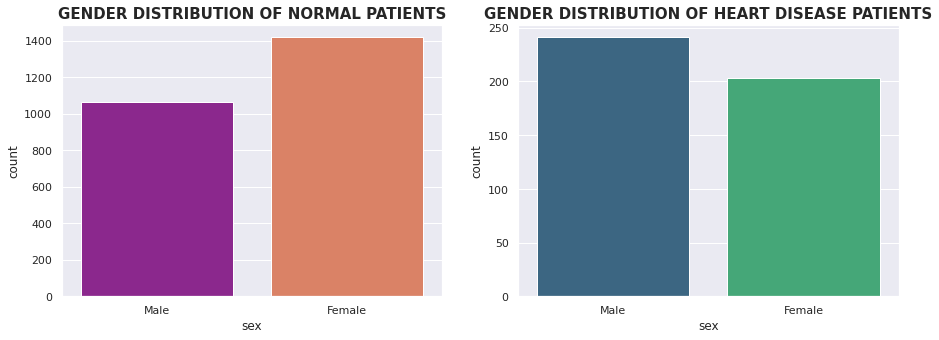

In [ ]:
# plotting normal patients
fig,ax=plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(normal['sex'], palette='plasma')
ax1.set(xticklabels = (['Male','Female']))
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )


#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(patient['sex'], palette='viridis')
ax1.set(xticklabels = (['Male','Female']))
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

* According to bar chart, males are more prone to heart disease as compared to females

3. Age Distribution

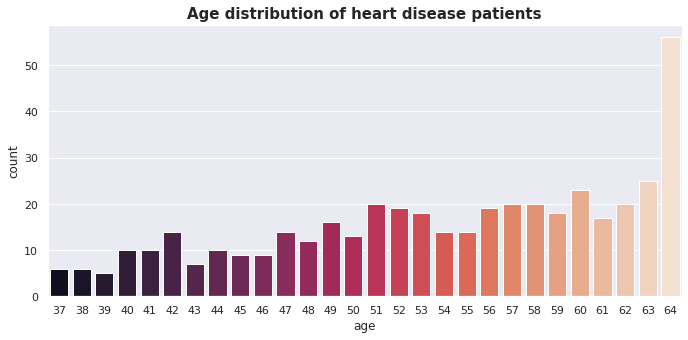

In [ ]:
#plotting heart patients
fig,ax=plt.subplots(figsize=(25,5))
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(patient['age'], palette='rocket')
plt.title('Age distribution of heart disease patients', fontsize=15, weight='bold' )
plt.show()

* According to the chart, as age increases, the chances of suffering from heart problems are more likely.

**4.Education Distribution**

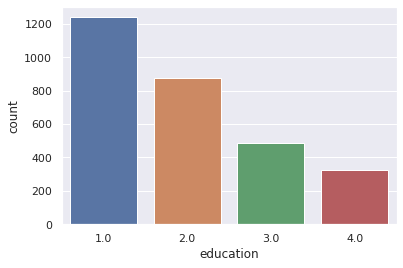

In [ ]:
sns.countplot(df1['education'])

* According to plot, highest and least education categories are 1 and 4 respectively.

Body Mass Index (BMI) Distribution

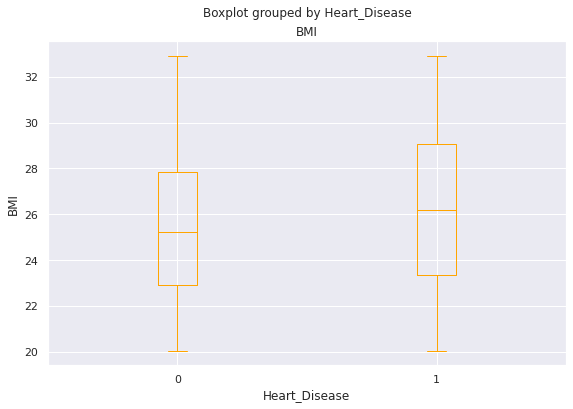

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df1.boxplot(column = 'BMI', by = 'Heart_Disease', ax = ax, color='orange')
ax.set_ylabel("BMI")
plt.show()

* According to boxplot, Higher BMI leads to higher chances of Heart Disease

**6.Cholestrol Distribution**

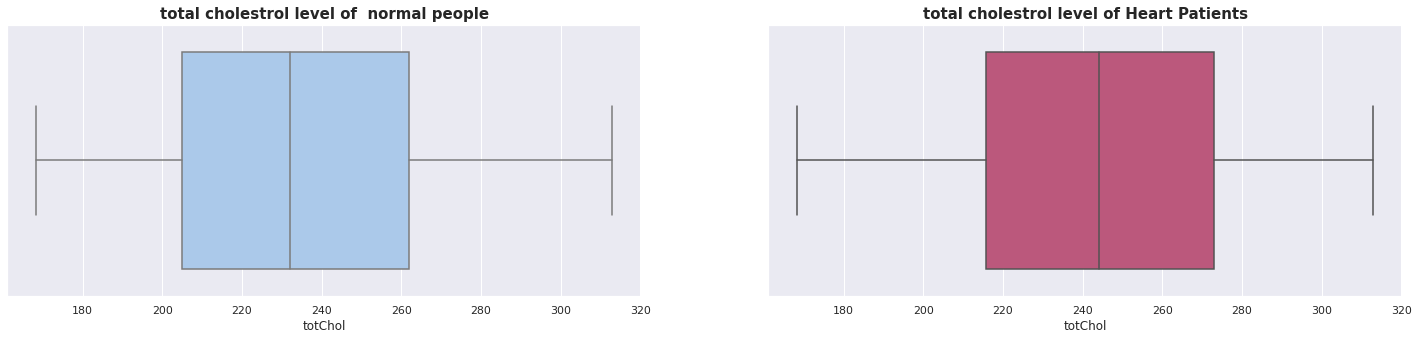

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(25,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.boxplot(x='totChol',data = normal, palette='pastel')
plt.title('total cholestrol level of  normal people', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.boxplot(x='totChol',data = patient, palette='plasma')
plt.title('total cholestrol level of Heart Patients', fontsize=15, weight='bold' )
plt.show()

* Total Cholestrol level of heart patient seems to be slightly higher than normal patient.
* People who have cholesterol level more than 240 are prone to heart problems.

 Mean Arterial Pressure (map) Distribution

Text(0.5, 1.0, 'Map of heart disease patients')

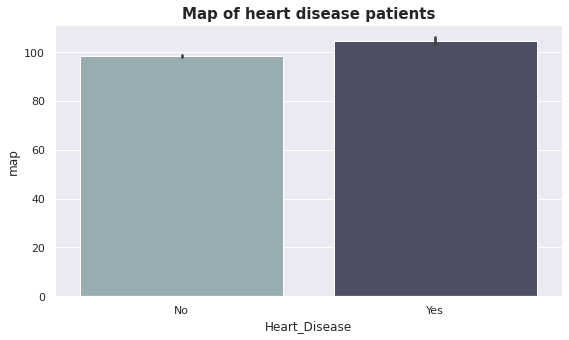

In [ ]:
#plotting heart patients
fig,ax1=plt.subplots(figsize=(20,5))
ax1 = plt.subplot2grid((1,2),(0,1))
sns.barplot(x=df1['Heart_Disease'],y=df1['map'],palette='bone_r')
ax1.set(xticklabels = (['No','Yes']))
plt.title('Map of heart disease patients', fontsize=15, weight='bold' )

* In the above graph, the heart disease patients have higher MAP.
* If the value of MAP is above 96, the patient is more prone to Heart Disease or suffer Hypertension.

**8.Mean and Median Visualization**

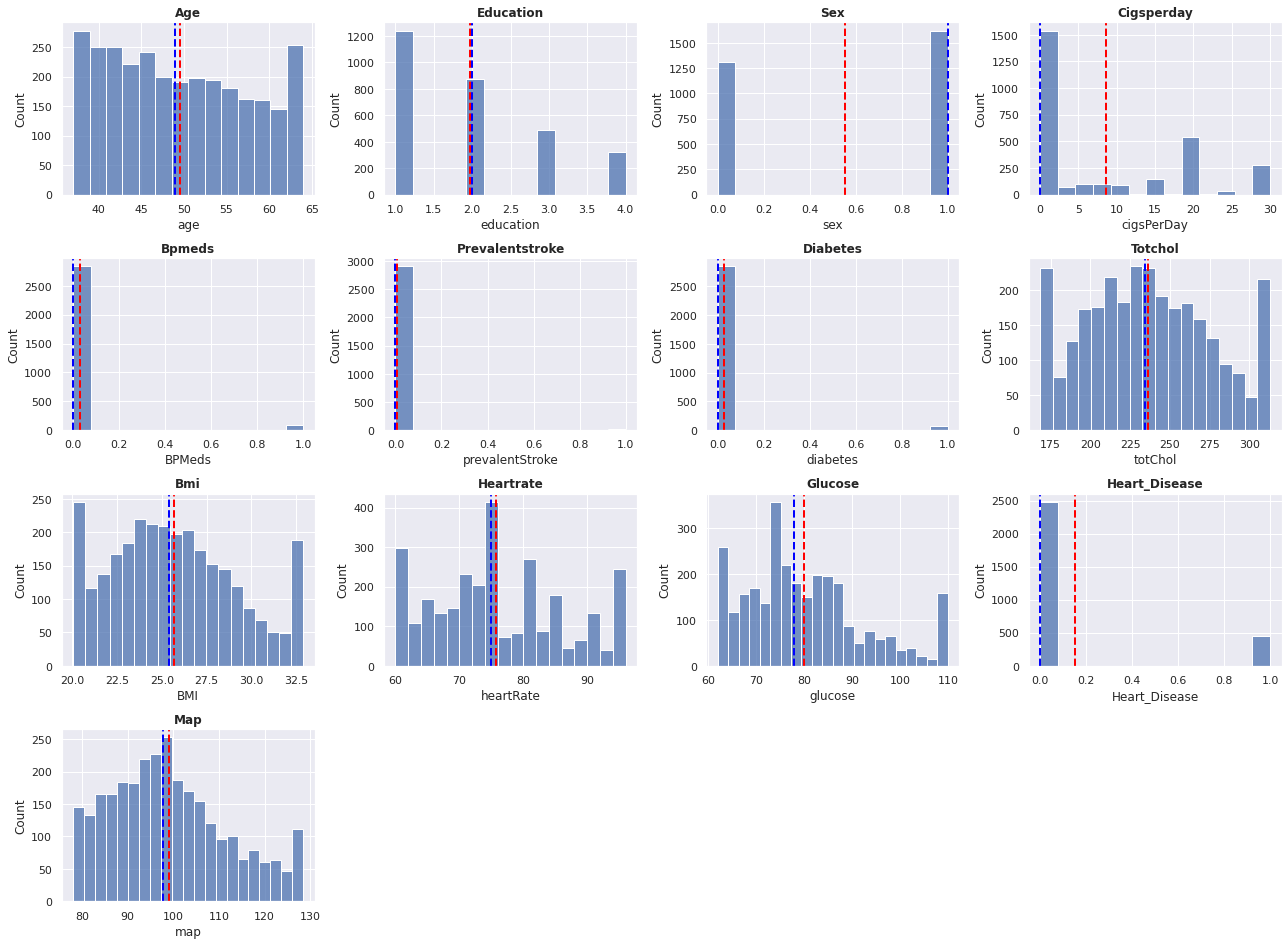

In [ ]:
# Visualizing the mean and median lines for various attributes, 
# along with their distribution graphs.
plt.figure(figsize=(18,16))

# Making subplots for all the features to represent their mean, median and distributions
for i, column in enumerate(df1.columns):
  feature = df1[column]
  ax=plt.subplot(5, 4, i+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2927 non-null   int64  
 1   education        2927 non-null   float64
 2   sex              2927 non-null   int64  
 3   cigsPerDay       2927 non-null   float64
 4   BPMeds           2927 non-null   float64
 5   prevalentStroke  2927 non-null   int64  
 6   diabetes         2927 non-null   int64  
 7   totChol          2927 non-null   float64
 8   BMI              2927 non-null   float64
 9   heartRate        2927 non-null   float64
 10  glucose          2927 non-null   float64
 11  Heart_Disease    2927 non-null   int64  
 12  map              2927 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 384.7 KB


# **Bivariate Analysis**

**1. BP Medication and Heart_Disease**

[[Text(0, 0, 'No'), Text(0, 0, 'Yes')]]

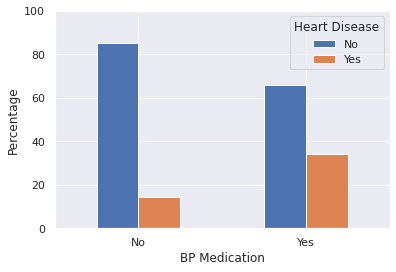

In [ ]:
freq_df = df1.groupby('Heart_Disease')['BPMeds'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
ax=pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.xlabel('BP Medication')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['No','Yes'],title='Heart Disease')
ax.set(xticklabels = (['No','Yes']))

* According to the chart, People who take Blood pressure medication have a higher chance of suffering from heart disease.

**2. Prevalent Stroke and Heart_Disease**

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

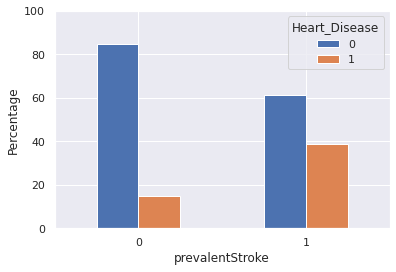

In [ ]:
freq_df = df1.groupby('Heart_Disease')['prevalentStroke'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

* According to the chart, people who previously had a stroke are more likely to suffer from Heart Disease.

**3. Sex and risk of Heart_Disease**

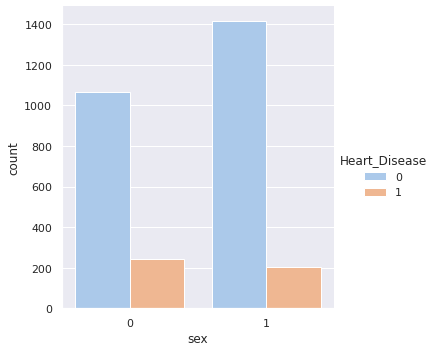

In [ ]:
sns.catplot(data= df1, kind='count', x='sex', hue='Heart_Disease', palette='pastel')
plt.show()

* According to the bar chart, males are more prone to heart disease as compared to females.

**4.Education and Heart_Disease**

[[Text(0, 0, 'No'), Text(0, 0, 'Yes')]]

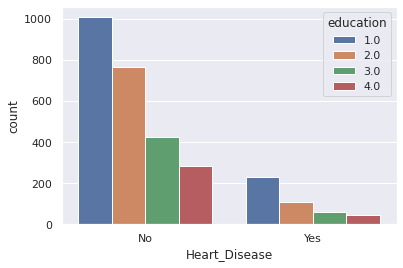

In [ ]:
# count plot of education levels people having diseases
ax=sns.countplot(x ='Heart_Disease', hue ='education', data = df1)
ax.set(xticklabels = (['No','Yes']))

* Education is not showing any strong connection with Heart_Disease( Target Variable) , so we are droping this feature.

In [ ]:
# droping education column
df1.drop("education",axis=1,inplace=True)

**5. Diabetes and Heart_Disease**

[[Text(0, 0, 'No'), Text(0, 0, 'Yes')]]

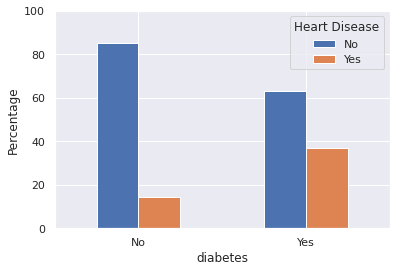

In [ ]:
freq_df = df1.groupby('Heart_Disease')['diabetes'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
ax=pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(['No','Yes'],title='Heart Disease')
ax.set(xticklabels = (['No','Yes']))

* According to the bar chart, Diabetic person is more likely to suffer from a heart disease.

#Conclusion- EDA
1. The dataset contains 85% normal persons and 15% heart patients 
2. Given dataset consists of 55% male and 45% female. 
3. Males are more prone to heart disease as compared to females. 
4.As age increases, the chances of suffering from heart problems are more likely. 
5. Higher BMI leads to higher chances of Heart Disease. 
6. Higher cholesterol indicates the higher chances of getting Heart Disease. 
7. If the value of MAP is above 96, the patient is more prone to Heart Disease or suffer Hypertension 
8. People who take Blood pressure medication have a higher chance of suffering from heart disease. 
9. People who previously had a stroke are more likely to suffer from Heart Disease. 
10. Diabetic person is more likely to suffer from a heart disease.

# **Models**

# **Dependent and Independent variables**

In [ ]:
# Splitting the data into set of independent variables and a dependent variable.
X = df1.drop('Heart_Disease',axis=1)
y = df1['Heart_Disease']

## Handling imbalance data using SMOTE

####**WHAT IS SMOTE ?**
This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases. SMOTE takes the entire dataset as an input, but it increases the percentage of only the minority cases.

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [ ]:
# define pipeline
under = RandomUnderSampler(sampling_strategy=0.8)
over = SMOTE(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_smote, y_smote = pipeline.fit_resample(X, y)

# **Train test split**

In [ ]:
# split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.20)

# Data Standardization

In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

##1.Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the model coefficients
lr_model.coef_

array([[ 0.59138425, -0.56938346,  0.1561594 ,  0.13139982, -0.07453412,
        -0.02107799,  0.224822  ,  0.03717753, -0.02366235,  0.10275319,
         0.27346872]])

In [ ]:
lr_model.intercept_

array([-0.2999103])

In [ ]:
train_pred = lr_model.predict_proba(X_train)
test_pred = lr_model.predict_proba(X_test)

In [ ]:
test_pred

array([[0.29891987, 0.70108013],
       [0.41583566, 0.58416434],
       [0.71285258, 0.28714742],
       ...,
       [0.84249085, 0.15750915],
       [0.72767367, 0.27232633],
       [0.63777359, 0.36222641]])

In [ ]:
# Get the predicted classes
X_pred_lr = lr_model.predict(X_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
#predicting probability
y_pred_proba_lr = lr_model.predict_proba(X_test)[:,1]

In [ ]:
# Defining a function to train the input model and print evaluation matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = features
    except:
      importance = np.abs(model.coef_[0])
      feature = X
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)
        # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm',fmt='.2f')
    plt.title(f'{label} Report')
    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm',fmt='.2f')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model

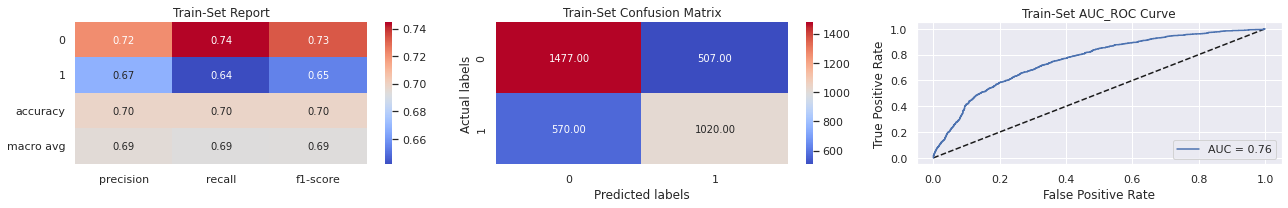

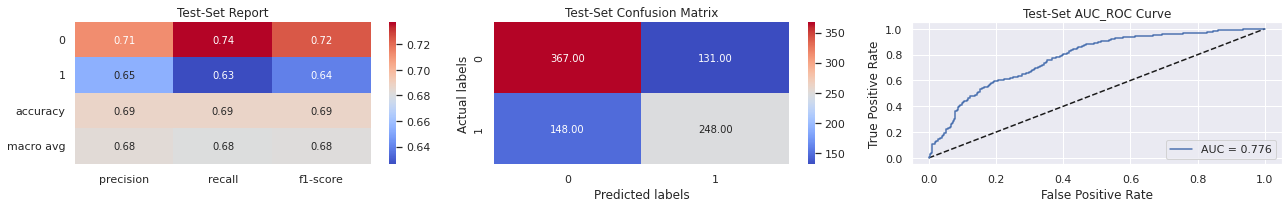

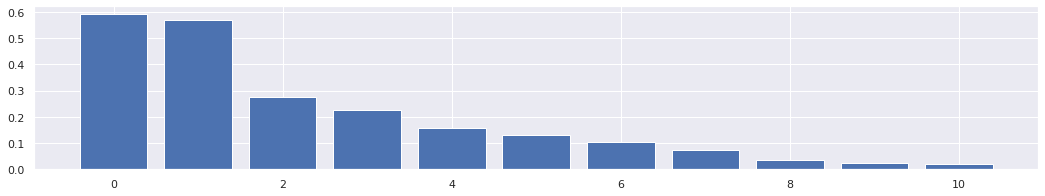

LogisticRegression(max_iter=10000)

In [ ]:
# Analysing logistic Regression model
analyse_model(lr_model,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Logistic Regression,0.687919,0.654354,0.626263,0.736948,0.64,0.775526


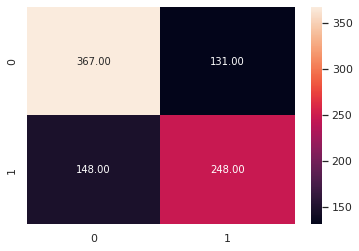

In [ ]:
#Creating evaluation matrix
from sklearn.metrics import confusion_matrix,roc_auc_score,precision_score,recall_score,f1_score,accuracy_score
CM=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(CM, annot=True,fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_lr)
roc=roc_auc_score(y_test, y_pred_proba_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

evaluation_metrics1 =pd.DataFrame([['Logistic Regression',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics1

# **2.KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)

# Fit the object to train dataset
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
#printing best parameters
knn_cv.best_params_

{'n_neighbors': 1}

In [ ]:
#predicting
y_pred_knn = knn_cv.predict(X_test)

#predicting probability
y_pred_proba_knn = knn_cv.predict_proba(X_test)[:,1]

Model Evaluation

In [ ]:
from sklearn.metrics import roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics

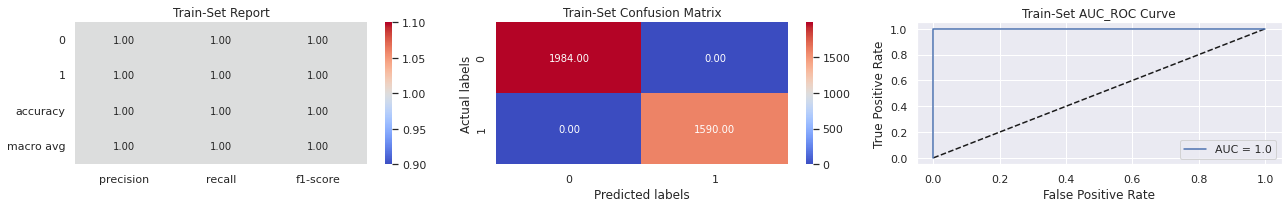

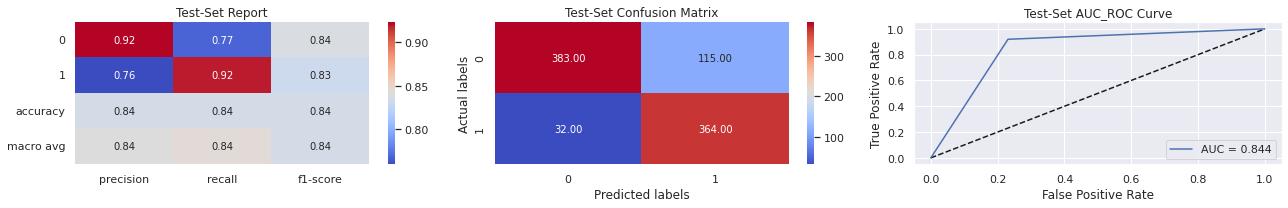

<Figure size 1296x216 with 0 Axes>

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
# Analysing KNN model
analyse_model(knn_cv,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,KNN,0.83557,0.759916,0.919192,0.769076,0.832,0.844134


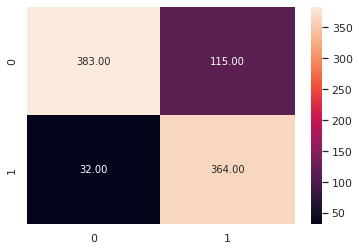

In [ ]:
CM=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_knn)
roc=roc_auc_score(y_test, y_pred_proba_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

evaluation_metrics2 =pd.DataFrame([['KNN',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics2

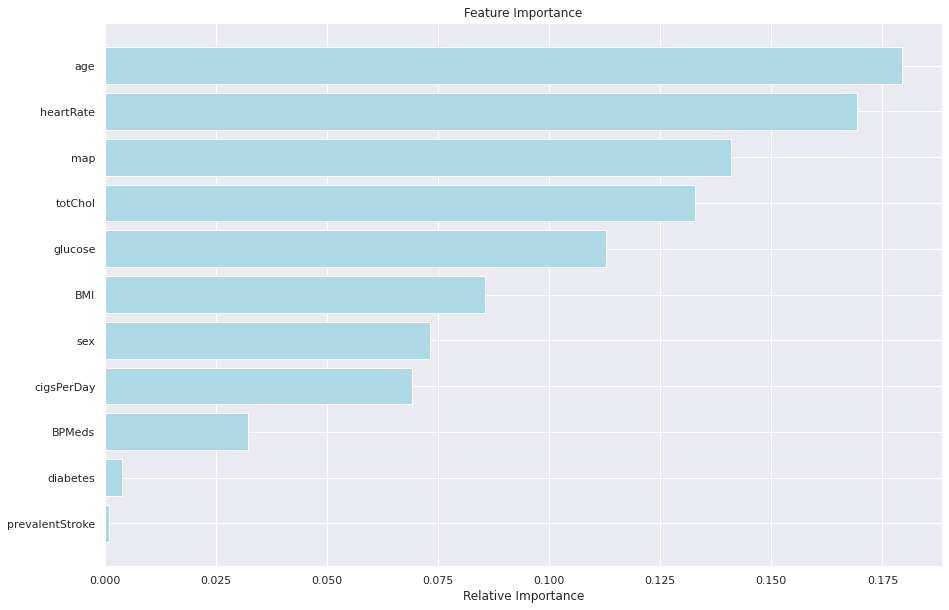

In [ ]:
#shows the graph of feature importance
features = X.columns
importances = dtc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **3.Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Decision Tree
dtc = DecisionTreeClassifier()

# Fitting model
dtc.fit(X_train,y_train)

#predicting
y_pred_dtc = dtc.predict(X_test)

#predicting probability
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]

Model Evaluation

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,DecisionTree,0.782998,0.740476,0.785354,0.781124,0.762255,0.783239


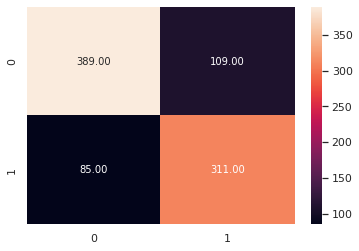

In [ ]:
# evaluation metric and confusion matrix for Decision Tree clssi model
CM=confusion_matrix(y_test,y_pred_dtc)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_dtc)
roc=roc_auc_score(y_test, y_pred_dtc)
prec = precision_score(y_test, y_pred_dtc)
rec = recall_score(y_test, y_pred_dtc)
f1 = f1_score(y_test, y_pred_dtc)

evaluation_metrics3 =pd.DataFrame([['DecisionTree',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics3

#**4.Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier_sm = RandomForestClassifier() 
grid_values_sm = {'n_estimators':[90,100,110], 'max_leaf_nodes':[110,115,120], 'max_depth':[13,14,15]}
classifier = GridSearchCV(classifier_sm, param_grid = grid_values_sm, scoring = 'roc_auc', cv=5)

In [ ]:
# Fit the object to train dataset
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [13, 14, 15],
                         'max_leaf_nodes': [110, 115, 120],
                         'n_estimators': [90, 100, 110]},
             scoring='roc_auc')

In [ ]:
#printing best parameters
classifier.best_params_

{'max_depth': 15, 'max_leaf_nodes': 120, 'n_estimators': 90}

In [ ]:
#predicting
y_pred_rf =classifier.predict(X_test)

#predicting probability
y_pred_proba_rf = classifier.predict_proba(X_test)[:,1]

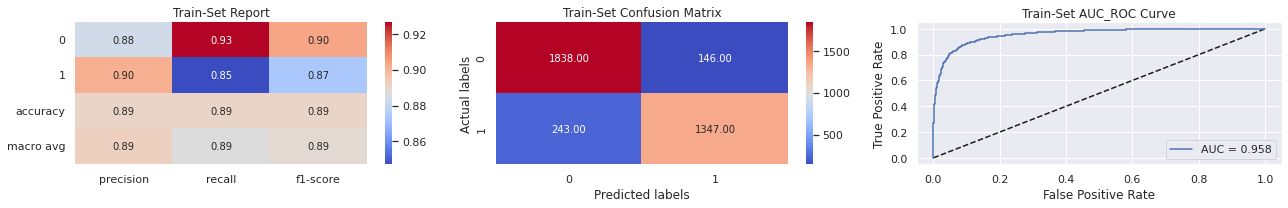

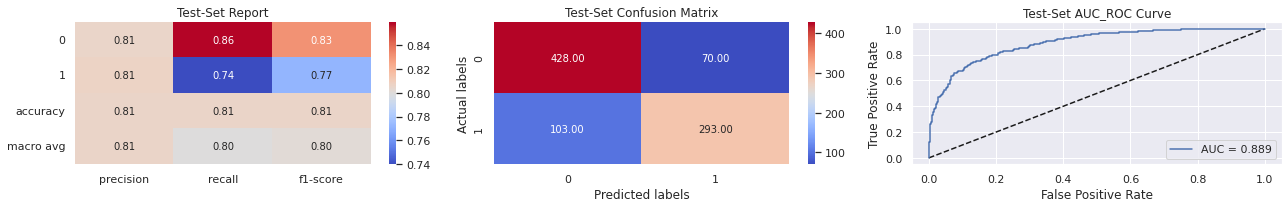

<Figure size 1296x216 with 0 Axes>

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [13, 14, 15],
                         'max_leaf_nodes': [110, 115, 120],
                         'n_estimators': [90, 100, 110]},
             scoring='roc_auc')

In [ ]:
# Analysing model Random forest model
analyse_model(classifier,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Random Forest,0.806488,0.807163,0.739899,0.859438,0.772069,0.799668


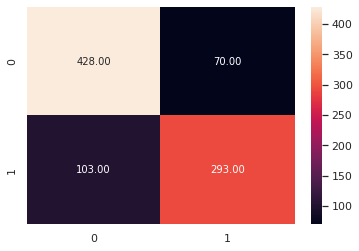

In [ ]:
# evaluation metric and confusion matrix for Random Forest model
CM=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_rf)
roc=roc_auc_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

evaluation_metrics4 =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics4

In [ ]:
optimal_rf=classifier.best_estimator_

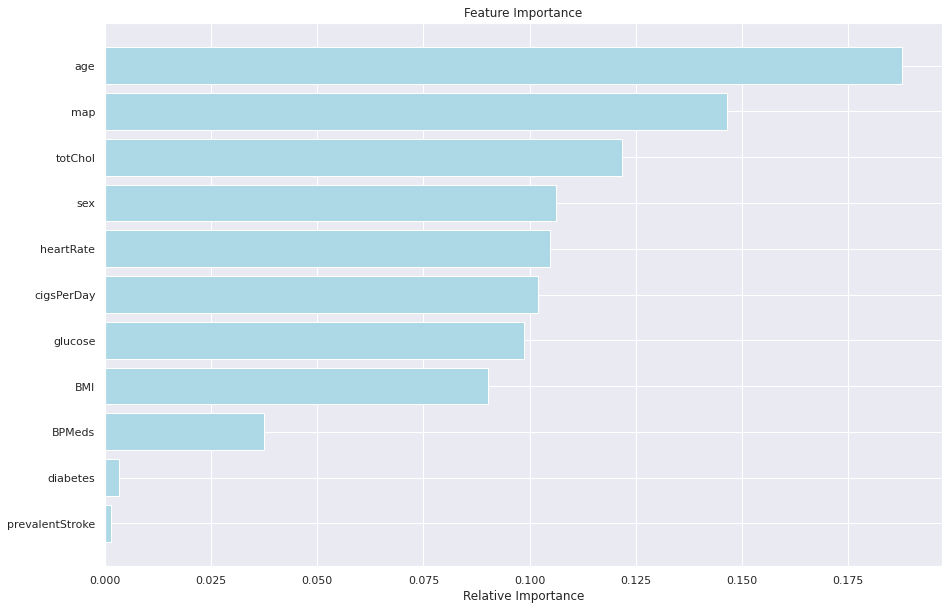

In [ ]:
#shows the graph of feature importance
features = X.columns
importances = optimal_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **5.Gradient Boost Classifier**

In [ ]:
#importing gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model = GradientBoostingClassifier()

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[185,190,195]
max_depth=[11,12,13]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)
gb_grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [11, 12, 13],
                         'n_estimators': [185, 190, 195]})

In [ ]:
#printing best parameter
gb_grid.best_params_

{'max_depth': 11, 'n_estimators': 195}

In [ ]:
#predicting
y_pred_gbm = gb_grid.predict(X_test)

#predicting probability
y_pred_proba_gbm = gb_grid.predict_proba(X_test)[:,1]

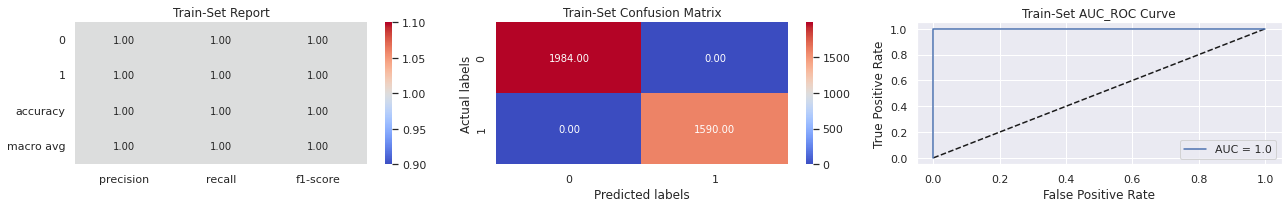

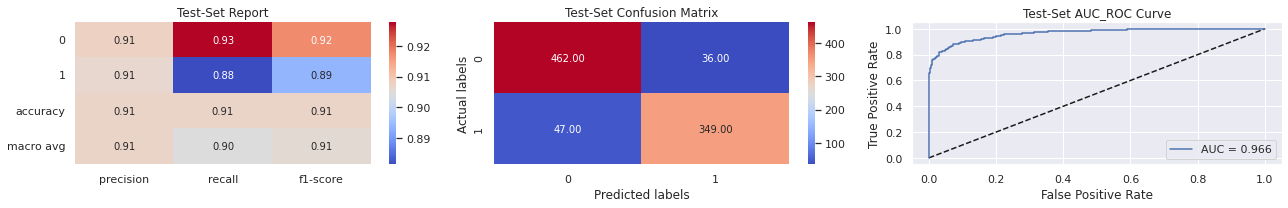

<Figure size 1296x216 with 0 Axes>

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [11, 12, 13],
                         'n_estimators': [185, 190, 195]})

In [ ]:
# Analysing Gradient Boost model
analyse_model(gb_grid,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,GradientBoosting,0.907159,0.906494,0.881313,0.927711,0.893726,0.904512


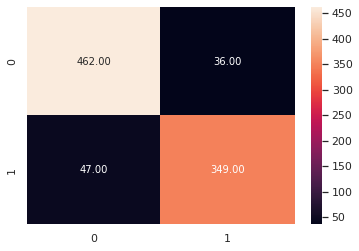

In [ ]:
# evaluation metric and confusion matrix for Gradient Boost model
CM=confusion_matrix(y_test,y_pred_gbm)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_gbm)
roc=roc_auc_score(y_test, y_pred_gbm)
prec = precision_score(y_test, y_pred_gbm)
rec = recall_score(y_test, y_pred_gbm)
f1 = f1_score(y_test, y_pred_gbm)

evaluation_metrics5 =pd.DataFrame([['GradientBoosting',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics5

In [ ]:
optimal_gb=gb_grid.best_estimator_

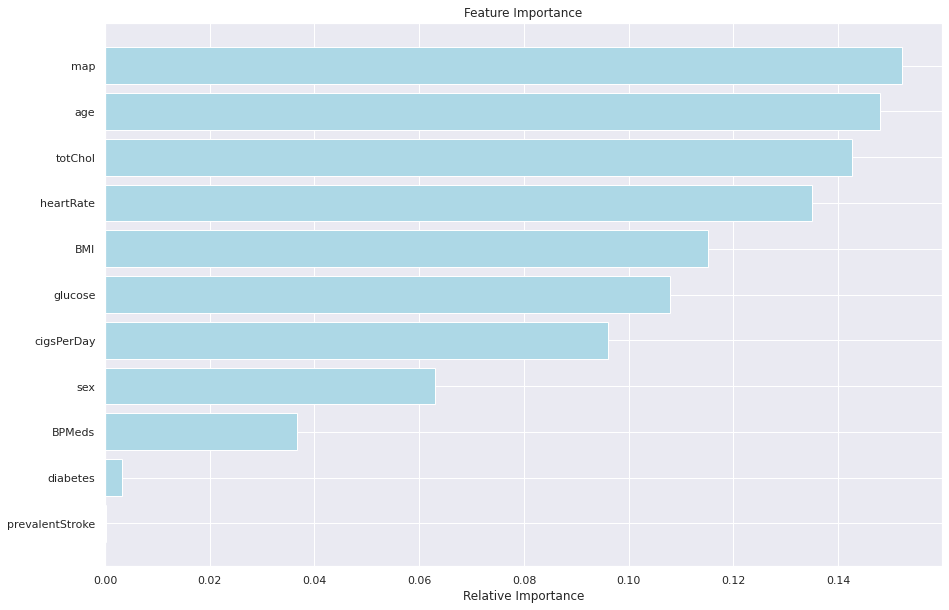

In [ ]:
#shows the graph of feature importance
features = X.columns
importances = optimal_gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **6.XGBoost**

In [ ]:
# importing XG Boost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

#creating param dict for gridsearch
n_estimators=[170,175,180]
max_depth=[20,25,30]
params = {'n_estimators':n_estimators,'max_depth':max_depth }

#creating xgb grid model
xgb= GridSearchCV(xgb_model,param_grid=params,verbose=0)

# Fitting model
xgb.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'max_depth': [20, 25, 30],
                         'n_estimators': [170, 175, 180]})

In [ ]:
#printing best parameters
xgb.best_params_

{'max_depth': 30, 'n_estimators': 175}

In [ ]:
#predicting
y_pred_xgb = xgb.predict(X_test)

#predicting probability
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

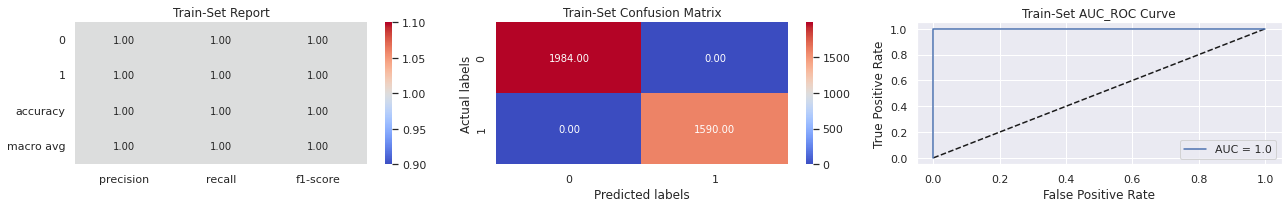

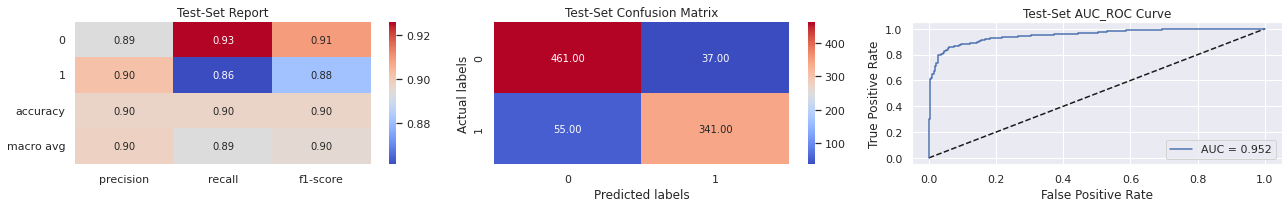

<Figure size 1296x216 with 0 Axes>

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'max_depth': [20, 25, 30],
                         'n_estimators': [170, 175, 180]})

In [ ]:
# Analysing XG Boost model
analyse_model(xgb,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,XGBoost,0.897092,0.902116,0.861111,0.925703,0.881137,0.893407


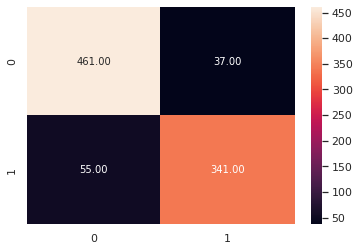

In [ ]:
# evaluation metric and confusion matrix for XG Boost model
CM=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_xgb)
roc=roc_auc_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

evaluation_metrics6 =pd.DataFrame([['XGBoost',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics6

In [ ]:
# finding best estimator
optimal_xgb=xgb.best_estimator_

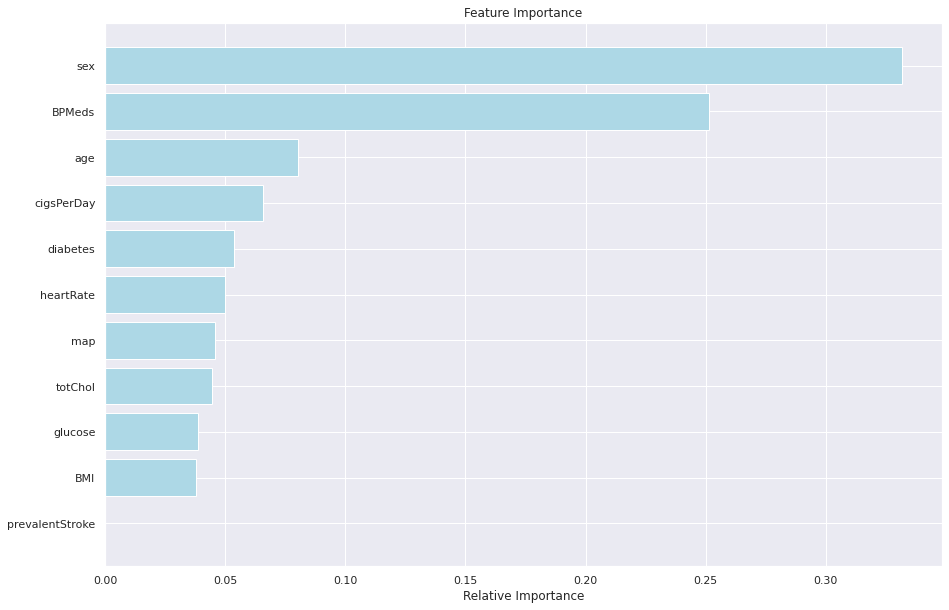

In [ ]:
#shows the graph of feature importance
features = X.columns
importances = optimal_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **7.Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Creating naive bayes model 
gnb = GaussianNB()

# Fitting the model
gnb.fit(X_train, y_train)
 
# Making predictions on training and testing set
y_pred_gnb = gnb.predict(X_test)

In [ ]:
# Display accuracy scores for training and testing sets
print(accuracy_score(y_pred_gnb, y_test))

0.6868008948545862


In [ ]:
# Prediction probabilities for naive bayes classifier
y_pred_proba_gnb = gnb.predict_proba(X_test)[:,1]

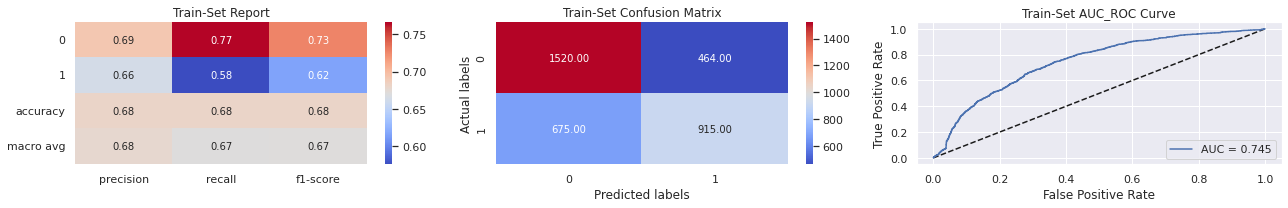

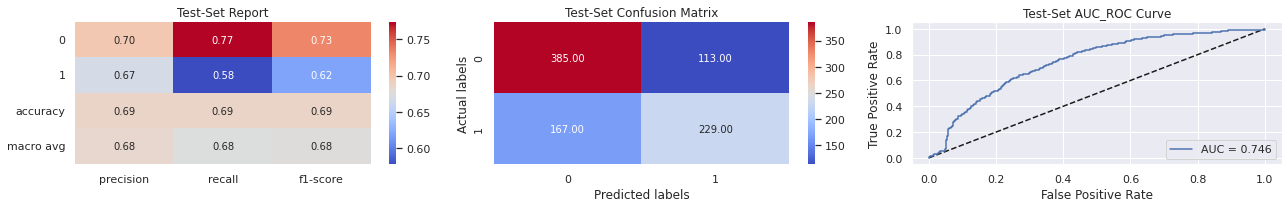

<Figure size 1296x216 with 0 Axes>

GaussianNB()

In [ ]:
# Analysing Naive Bayes model
analyse_model(gnb,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Naive Bayes,0.686801,0.669591,0.578283,0.773092,0.620596,0.675688


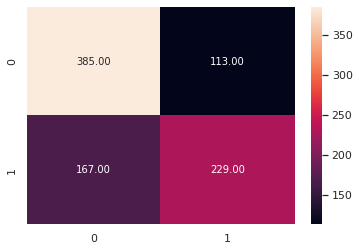

In [ ]:
# evaluation metric and confusion matrix for Naive Bayes classifier model
CM=confusion_matrix(y_test,y_pred_gnb)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_gnb)
roc=roc_auc_score(y_test, y_pred_gnb)
prec = precision_score(y_test, y_pred_gnb)
rec = recall_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)

evaluation_metrics7 =pd.DataFrame([['Naive Bayes',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics7

# **8.Support Vector Classifier**

In [ ]:
#importing support vector classifier
from sklearn.svm import SVC

In [ ]:
# Support vector classifier
svc = SVC()

# running grid search for optimal parameters
param_grid = {'C': [0.1,1, 10], 
              'gamma': [1,0.1,0.01],
              'kernel': ['linear','rbf','sigmoid'],
              'probability':[True]}
 
svm_classifier = GridSearchCV(svc, param_grid,cv=2)

#fitting model
svm_classifier.fit(X_train,y_train)

#Predicting
y_pred_svc = svm_classifier.predict(X_test)

#predicting probability
y_pred_proba_svc = svm_classifier.predict_proba(X_test)[:,1]

In [ ]:
# Support vector classification model's best parameters
svm_classifier.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf', 'probability': True}

Model Evaluation

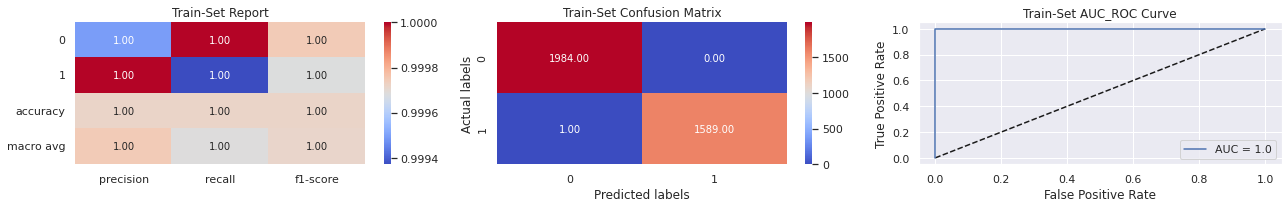

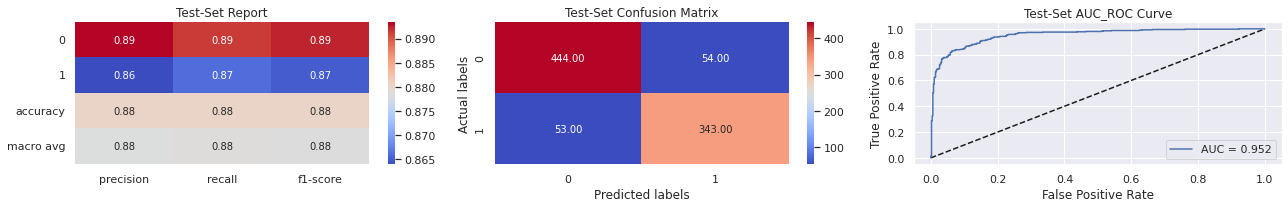

<Figure size 1296x216 with 0 Axes>

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'probability': [True]})

In [ ]:
# Analysing Support vector classication model
analyse_model(svm_classifier,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,SupportVector,0.880313,0.86398,0.866162,0.891566,0.865069,0.878864


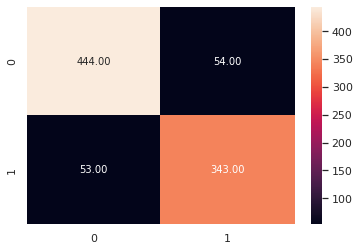

In [ ]:
# evaluation metric and confusion matrix for support vector model
CM=confusion_matrix(y_test,y_pred_svc)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_svc)
roc=roc_auc_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

evaluation_metrics8 =pd.DataFrame([['SupportVector',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics8

# **Models' Evaluation Matrix**

In [ ]:
# Evaluation metrics list
evaluation_metrics = [evaluation_metrics1,evaluation_metrics2,evaluation_metrics3,
                      evaluation_metrics4,evaluation_metrics5,evaluation_metrics6,
                      evaluation_metrics7,evaluation_metrics8]

In [ ]:
# Concatnating all evaluation metrics into one DataFrame
em_list=pd.concat(evaluation_metrics).reset_index(drop=True).set_index('Model')

# using seaborn color palette as well as
# min('lighblue'), mid(green), max('blue') values
cm = sns.light_palette("lightgreen", as_cmap=True)
em_list.style.background_gradient(cmap=cm).set_precision(2).highlight_min(axis=0, color='lightgreen').highlight_max(axis=0, color='green')

,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
Model,,,,,,
Logistic Regression,0.69,0.65,0.63,0.74,0.64,0.78
KNN,0.84,0.76,0.92,0.77,0.83,0.84
DecisionTree,0.78,0.74,0.79,0.78,0.76,0.78
Random Forest,0.81,0.81,0.74,0.86,0.77,0.80
GradientBoosting,0.91,0.91,0.88,0.93,0.89,0.90
XGBoost,0.90,0.90,0.86,0.93,0.88,0.89
Naive Bayes,0.69,0.67,0.58,0.77,0.62,0.68
SupportVector,0.88,0.86,0.87,0.89,0.87,0.88


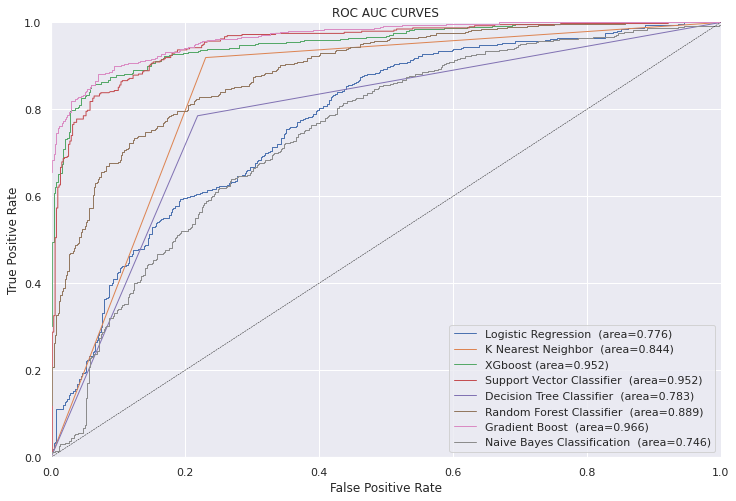

In [ ]:
# ROC_AUC bar plot of all models
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,lr_model.predict_proba(X_test),label='Logistic Regression ',l='-')
roc_auc_plot(y_test,knn_cv.predict_proba(X_test),label='K Nearest Neighbor ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
roc_auc_plot(y_test,svm_classifier.predict_proba(X_test),label='Support Vector Classifier ',l='-')
roc_auc_plot(y_test,dtc.predict_proba(X_test),label='Decision Tree Classifier ',l='-')
roc_auc_plot(y_test,classifier.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,gb_grid.predict_proba(X_test),label='Gradient Boost ',l='-')
roc_auc_plot(y_test,gnb.predict_proba(X_test),label='Naive Bayes Classification ',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('ROC AUC CURVES')
sns.despine()

Here, we can see the highest average area under the curve (AUC) of 0.96 is attained by Gradient Boost Classifier and second highest is of 0.95 attained by Support Vector Classifier.

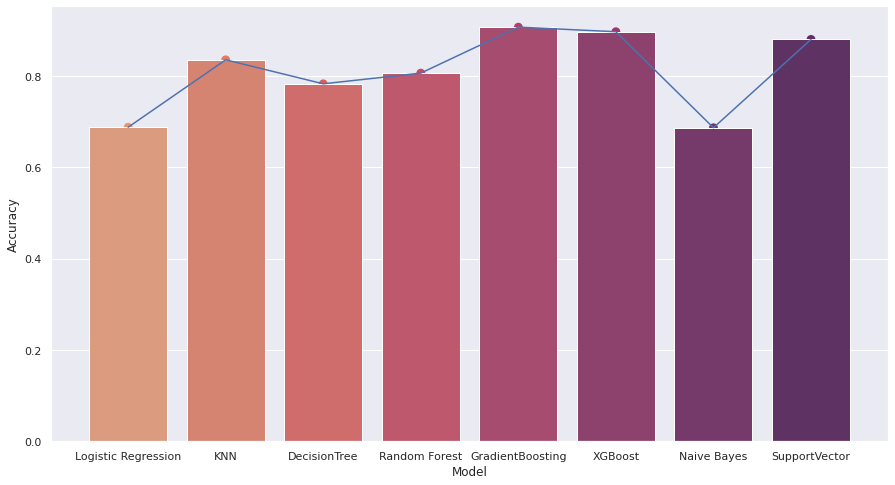

In [ ]:
#Accuracy barplot of model's
em_list = em_list.reset_index(drop=False)
sns.set(rc={'figure.figsize':(15,8)})
sns.pointplot(data=em_list,x='Model',y='Accuracy',palette = 'flare')
sns.barplot(data=em_list,x='Model',y='Accuracy',palette = 'flare')
sns.lineplot(data=em_list,x='Model',y='Accuracy',palette = 'flare')

We can see the Highest Accuracy among all the models is of Gradient Boosting followed by Support Vector Classifier.

#Conclusion - Model
1. According to **Decision Tree and Random forest model**, **age** is the most important feature but according to **gradient boost and XG boost model**, most important features are **heart rate and sex respectively**.
2. **Gradient boost model is the most accurate model** among  all the models, on the basis of evaluation parameters such as  **Accuracy (91%), Precision (91%), Specificity (93%), F1 score (89%), and AUC-ROC score (90%)**.
3. **KNN model** is the best model on the basis of **Recall (92%)**.
4. **Logistic Regression model** has the least **Accuracy (69%)**.